# Altair: Declarative Visualization in Python

This is a quick tutorial on [Altair](altair-viz.github.io), a powerful visualization tool in python. 

## Installation
Here I present a quick installation procedure of Altair. For more details/options see [here](https://altair-viz.github.io/getting_started/installation.html#installation). 

**Note**: While you can use Altair with Jupyter notebook, it is recommended to use Altair with Jupyterlab, a perfect (and way more powerful) alternative to Jupyter notebooks.

**Quick install**:
pip install altair vega_datasets jupyterlab

Then from terminal type in: jupyter lab

### Quick Example

In [1]:
import altair as alt

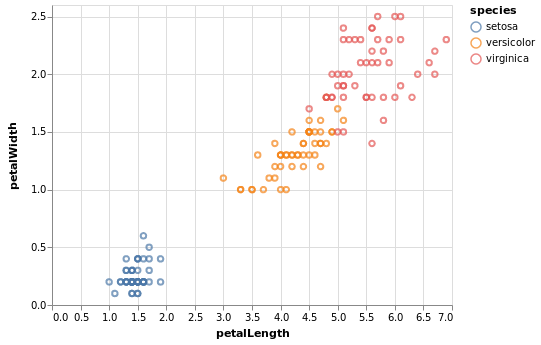

In [35]:
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).interactive() # by adding the .interactive() method, you can zoom in/out 

### Pandas dataframe visualization with Altair

In [3]:
import pandas as pd

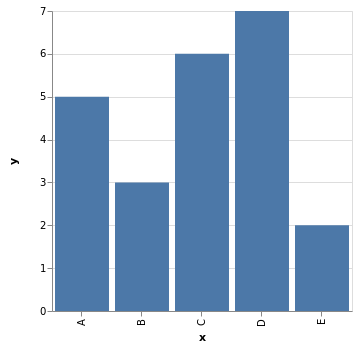

In [63]:
data = pd.DataFrame({'x' : ['A', 'B', 'C', 'D', 'E'], 'y' : [5, 3, 6, 7, 2]})
alt.Chart(data).mark_bar().encode(
    x = 'x',
    y = 'y',
).properties(
    height = 300,
    width = 300
)

Note that you can also save the image as SVG or PNG (In my version, I should hover on the dots on the top right to see the options).

In [36]:
import numpy as np

In [47]:
rand = np.random.RandomState(0)
data = pd.DataFrame({'value' : rand.randn(100).cumsum()}, index = pd.date_range('2018', freq = 'D', periods = 100))
data.head()

,value
2018-01-01,1.764052
2018-01-02,2.164210
2018-01-03,3.142948
2018-01-04,5.383841
2018-01-05,7.251399


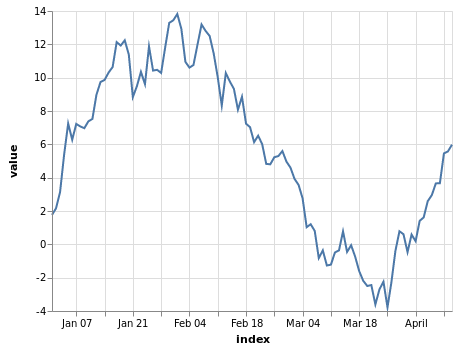

In [48]:
alt.Chart(data.reset_index()).mark_line().encode(
    x = 'index:T',
    y = 'value:Q'
)

In [12]:
from vega_datasets import data

In [13]:
cars = data.cars()

In [38]:
cars.head(3)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01


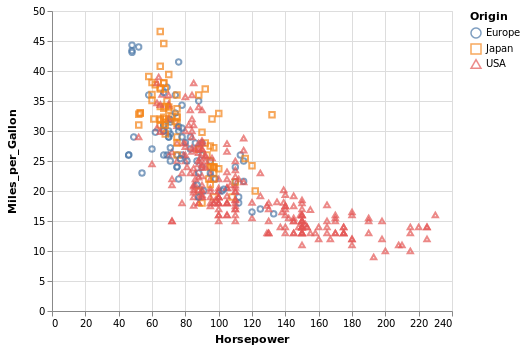

In [14]:
alt.Chart(cars).mark_point().encode(
    x = 'Horsepower', 
    y = 'Miles_per_Gallon',
    color = 'Origin', 
    shape = 'Origin'
)

### Histogram

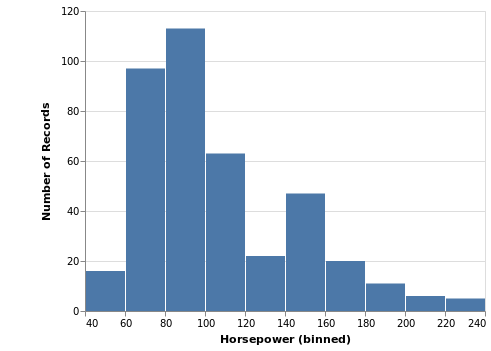

In [33]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin = True),
    y = 'count()'
)

### Two Dimensional Histogram

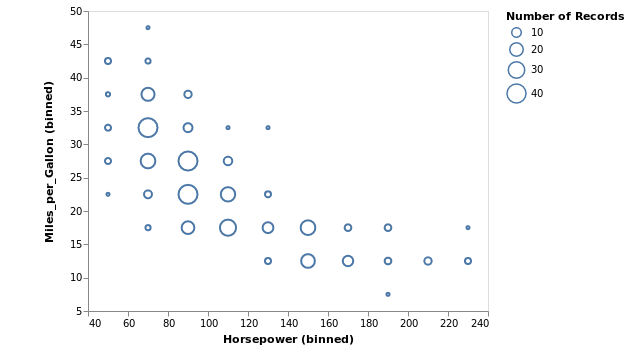

In [45]:
alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower', bin = True),
    alt.Y('Miles_per_Gallon', bin = True),
    size = 'count()'
)

### Three Dimensional Histogram
You can even present the histogram of three quantities:

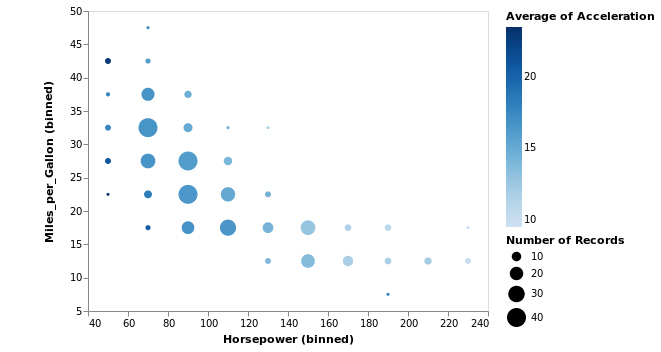

In [51]:
alt.Chart(cars).mark_circle().encode(
    alt.X('Horsepower', bin = True),
    alt.Y('Miles_per_Gallon', bin = True), 
    size = 'count()',
    color = 'average(Acceleration)'
)

### Selection interval
This is one of the coolest features of Altair. Click on the left chart and drag to create a selection rectangle. Then move the rectangle around and see how the right chart follows. This feature could be very usefull for Explatory Data Analysis (EDA). 

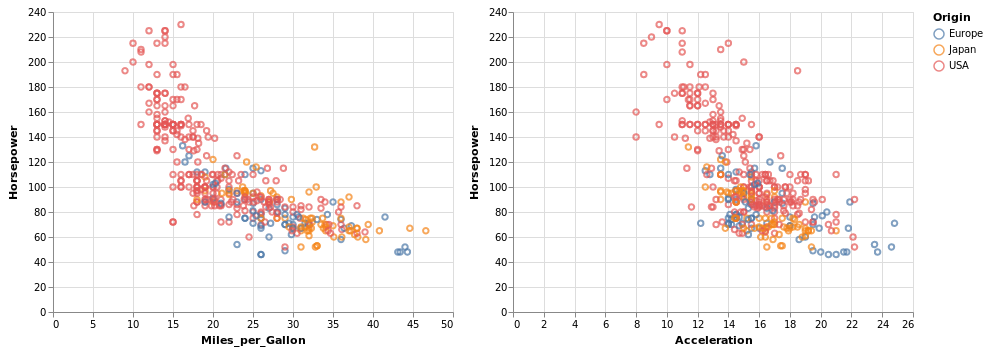

In [30]:
interval = alt.selection_interval(encodings=['x', 'y'])
chart = alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower', 
    color = alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection = interval
)
chart | chart.encode(x = 'Acceleration')